In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def gis_prediction():
    return model_size / bandwidth_dict["s2c"] + model_size / bandwidth_dict["s2c"] * (1-recv_ratio) * (nr_worker-1)
def emp_prediction():
    time_fixed_model = (2 * model_size) / bandwidth_dict["c2c"]
    return (nr_worker - 1) * (1 + recv_ratio) * time_fixed_model + mul_time_per_million * (param_size/1000000)
def agg_prediction():
    return 2 * nr_layer * ((nr_worker - 1) * (nr_worker * time_cmd)) + (nr_worker - 1) * nr_worker *  (param_size/1000000) * add_p
def dec_prediction():
    return nr_worker * (model_size * 2 / bandwidth_dict["c2w"])

In [15]:
# resnet 18 (1000mbps)
param_size = 11689512
model_size = param_size * 32
add_p = 0.0014
add_time_per_million = 0.012
mul_time_per_million = 0

nr_layer = 62
nr_worker = 24
recv_ratio = 91.55/100

bandwidth_dict = {}
bandwidth_dict["s2c"] = 47.2 * 1000 * 1000
bandwidth_dict["c2c"] = 48.97 * 1000 * 1000
bandwidth_dict["c2w"] = 465 * 1000 * 1000

time_cmd = 0.002

In [16]:
gis_prediction()

23.32751089627119

In [17]:
emp_prediction()

673.0638159565449

In [18]:
agg_prediction()

145.92965487360001

In [19]:
dec_prediction()

38.613097703225804

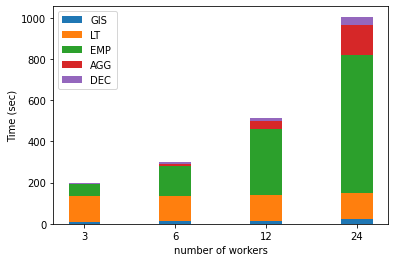

In [21]:
N = 4
width = 0.35
x = ("3", '6', '12', '24')

gis = (9.264, 11.273, 15.29, 23.33)
lt = tuple([124.91] * N)
emp = (58.5273, 146.32, 321.9, 673.064)
b_emp = list(np.add(gis, lt))
agg = (1.5862, 7.931, 34.896, 145.93)
b_agg = list(np.add(b_emp, emp))
dec = (4.8266, 9.6533, 19.3, 38.6131)
b_dec = list(np.add(b_agg, agg))

plt.bar(x, gis, width)
plt.bar(x, lt, width, bottom=gis)
plt.bar(x, emp, width, bottom=b_emp)
plt.bar(x, agg, width, bottom=b_agg)
plt.bar(x, dec, width, bottom=b_dec)

plt.ylabel('Time (sec)')
plt.xlabel('number of workers')
plt.title('')
plt.legend(labels=['GIS', 'LT', "EMP", "AGG", "DEC"])